In [2]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

/home/irfan/.local/share/virtualenvs/ds_code-Sb-xMZMk/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [4]:
ss = np.random.seed(seed=1)
ss

In [14]:
loans = pd.read_csv('loans_income.csv', squeeze=True)
sp500 = pd.read_csv('sp500_data.csv.gz', index_col=0, squeeze=True)

In [15]:
loans.head(2)

0    67000
1    52000
Name: x, dtype: int64

In [16]:
sp500.head(2)

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.125,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.125,0.0


## **Sampling Distribution of a Statistics**

In [20]:
sample_data = pd.DataFrame({
    'income': loans.sample(1000),
    'type': 'Data'
})
sample_mean_5 = pd.DataFrame({
    'income': [loans.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5'
})
sample_mean_20 = pd.DataFrame({
    'income': [loans.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20'
})

results = pd.concat([sample_data, sample_mean_5, sample_mean_20])
results.head(5)

,income,type
35205,66000.0,Data
8265,68000.0,Data
17235,120000.0,Data
11231,40000.0,Data
4276,31000.0,Data


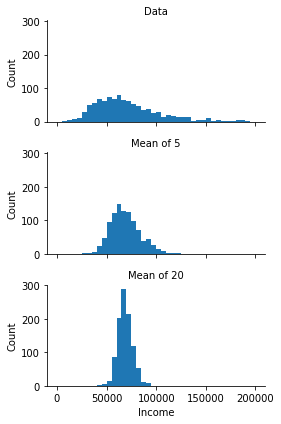

In [23]:
g = sns.FacetGrid(results, col='type', col_wrap=1, height=2, aspect=2)
g.map(plt.hist, 'income', range=[0,200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

# The Bootstrap

In [24]:
bresults = []
for nrepeats in range(1000):
    sample = resample(loans)
    bresults.append(sample.median())

bresults = pd.Series(bresults)
print('Bootstrap Statistics:')
print(f'original: {loans.median()}')
print(f'bias: {bresults.mean() - loans.median()}')
print(f'std. error: {bresults.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -65.57450000000244
std. error: 199.1292360563923


# Confidence Intervals

68760.51844
55734.1


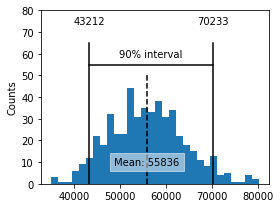

In [26]:
print(loans.mean())
np.random.seed(seed=3)

sample20 = resample(loans, n_samples=20, replace=False)
print(sample20.mean())

results = []
for nrepeats in range(500):
    sample = resample(sample20)
    results.append(sample.mean())

results = pd.Series(results)

confidence_interval = list(results.quantile([0.05,0.95]))
ax = results.plot.hist(bins=30, figsize=(4,3))
ax.plot(confidence_interval, [55,55], color='black')
for x in confidence_interval:
    ax.plot([x,x], [0,65], color='black')
    ax.text(x, 75, f'{x:.0f}',
    horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval)/2, 60, '90% interval',
    horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0,50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white',alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0,80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Counts')

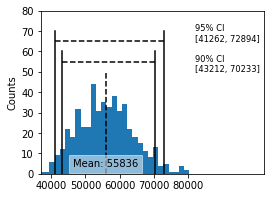

In [28]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

# Normal Distribution
## Standard Normal and QQ-Plots
The package _scipy_ has the function (`scipy.stats.probplot`) to create QQ-plots. The argument `dist` specifies the distribution, which is set by default to the normal distribution.

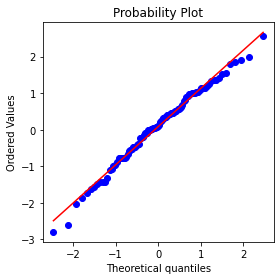

In [29]:
fig, ax= plt.subplots(figsize=(4,4))
norm_samlpe = stats.norm.rvs(size=100)
stats.probplot(norm_samlpe, plot=ax)

plt.tight_layout()
plt.show()